# Vaja 2 - Od kamere do preproste detekcije predmetov

Da uspešno opravite vajo, jo morate predstaviti asistentu na vajah. Pri nekaterih nalogah so vprašanja, ki zahtevajo skiciranje, ročno računanje in razmislek. Končno rešitev na takšna vprašanja vpišite v predvideni prostor, postopek reševanja pa razložite asistentu na vajah. Deli nalog, ki so označeni s simbolom $\star$ niso obvezni. Brez njih lahko za celotno vajo dobite največ <b>75</b> točk (zgornja meja je <b>100</b> točk kar pomeni oceno 10). Vsaka naloga ima zraven napisano tudi število točk. V nekaterih vajah je dodatnih nalog več in vam ni potrebno opraviti vseh.


## Naloga 1: Kamera

Namen te naloge je spoznati model kamere z luknjico (<i>pin-hole camera</i>) ter osnove digitalnega zajema slike. Kot ste to izvedeli na predavanjih, model kamere z luknjico opisuje par preprostih geometrijskih razmerij:

$x = -f \frac{X}{Z} \ \mbox{in} \ y = -f \frac{Y}{Z}$,<br>


ki vsako točko v prostoru s koordinatami $(X, Y, Z)$ preko goriščne razdalje $f$ poveže z njeno projekcijo na sliki $(x, y)$. Grafično je povezava prikazana še na spodnji sliki.

<center>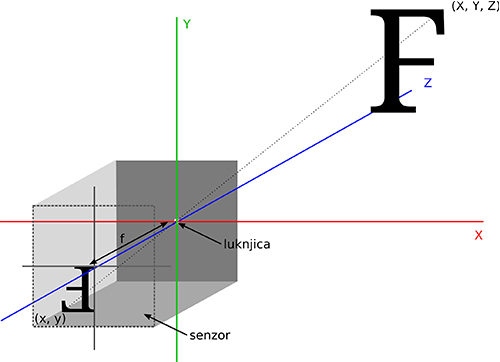</center>

Rešite naslednje naloge:

* Kockasta škatla z velikostjo stranice $10cm$ z majhno odprtino na prednji strani deluje kot kamera z luknjico. Usmerimo jo proti drevesu, ki je od kamere oddaljeno $14m$. Kako velika je slika drevesa, ki nastane na zadnji strani škatle, če je drevo visoko $5m$? Rešitev poslikaj in dodajte sliko v Jupyter notebook <i>(Edit -> Inster Image)</i>.

#### Answer
$$f = 10cm, Z = 14m, X = 5m$$
$$x=-10*\frac{500}{1400}$$
$$x = -3.5 cm$$

* Z enako kamero, kot v prejšnji nalogi opazujemo avtomobil, širok $2.5m$, ki je na začetku od kamere oddaljen $10m$, nato pa se z enakomernim pospeškom $0.5\frac{m}{s^2}$ oddaljuje od kamere. S pomočjo Python skripte in knjižnice MatPlotLib narišite graf, kako se širina slike avtomobila spreminja s časom. Izračunajte vrednosti za prvih $30s$ v intervalu $10$ meritev na sekundo. Za izris grafa uporabite funkcijo <i>matplotlib.pyplot</i>.

In [1]:
import numpy as np

# acceleration is 0.5 m per sec per sec, starting dist = 10m, t is time in sec
def get_dist(t):
    s0 = 10
    a = 0.5
    return s0 + (1/2 * a * t**2)

def get_change(t):
    dist = get_dist(t)
    width = 2.5
    f = 10
    return f * width/dist

In [2]:
time_range = np.linspace(0, 30, 300)
get_change_v = np.vectorize(get_change)
change = get_change_v(time_range)

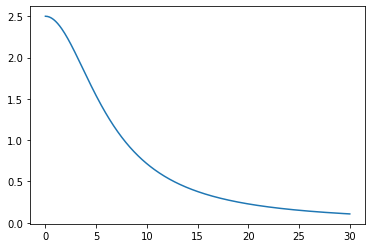

In [3]:
import matplotlib.pyplot as plt
    
plt.plot(time_range, change)

* Zakaj se kamere z luknjico uporabljajo bolj kot teoretičen model in ne tudi v praksi? Naštejte prednosti in slabosti kamer z lečami.

#### Answer
Pinhole cameras provide higher accuracy but the pinhole is so small, barely any light enters it (it would take a long time to produce an image).
Lenses don't provide highest accuracy but are big enough to produce an image.

Sliko, ki je projecirana na zadnjo stran kamere, zajamemo v digitalno obliko z (največkrat) matričnim senzorjem. Več o tem ste povedali že na predavanih, tu pa ponovimo samo, da sta najpomembnejša parametra senzorja njegova velikost in gostota. Ker se gostota senzorja največkrat podaja v točkah na inčo (<i>dots per inch -- DPI</i>), si je na tem mestu pametno zapomniti, da je $1 \mathrm{inch} = 2.54 cm$.

* S kamero z goriščno razdaljo $f = 60mm$ posnamemo sliko vertikalnega valja, ki je od kamere oddaljen $95m$. Določi višino valja, če v digitalizirani obliki slika valja po višini zavzame $200$ slikovnih elementov. Ločljivost tipala je $2500$ DPI.

$$f=60mm, Z=95m, DPI=2500\frac{px}{inch}, X_D=200px$$<br>
$$DPI=\frac{2500}{2.54}=984.252\frac{px}{cm}$$<br>
Now we trasnform px to cm: $$x=\frac{200}{984.252}=0.203cm$$<br>
$$X=-Z*\frac{x}{f}=-9500*\frac{0.203}{6}=-321.417cm$$

* <b>$\star$ (10 točk)</b> Za naslednjo nalogo boste potrebovali spletno kamero ter OpenCV knjižnico. Spletna kamera sicer ni čista kamera z luknjico, vsebuje lečo, zato pri zajemu slike prihaja do določene stopnje popačenja. Kljub temu z uporabo kamere preizkusite zakonitosti, ki jih opisuje enačba kamere z luknjico v praksi. Kamero postavite na statično mesto s pogledom na mizo. Pred kamero na izmerjeno razdaljo od nje postavite objekt. S programom za zajem slik iz kamere pridobite več (vsaj šest) zaporednih slik objekta pri čemer objekt premikajte na različne razdalje in zabeležite oddaljenost od kamere. Nato posamezne slike naložite v Jupyter notebook in zabeležite višino objekta v številu slikovnih elementov (pomagajte si z orodjem <i>PyPlot</i>, lahko pa to naredite tudi v programu za urejanje slik). Na podlagi višine v slikovnih elementih in oddaljenosti od kamere lahko določite kakšna bo velikost v slikovnih elementih pri drugi razdalji od kamere. Preverite oceno še z dejansko meritvijo in ocenite napake.

In [4]:
# Zapišite rešitev tukaj

## Naloga 2: Procesiranje slik

Namen te naloge je spoznavanje z osnovno funkcionalnostjo OpenCV in z zapisom slik v matrikah.

* Preberite sliko iz datoteke <i>umbrellas.jpg</i> z uporabo knjižnice OpenCV in jo prikažite z uporabo knjižnice MatPlotLib.

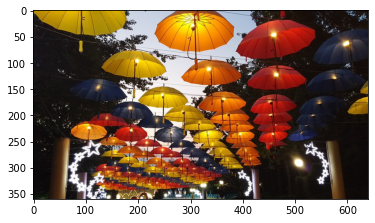

In [5]:
# Zapišite rešitev tukaj
import cv2

img = cv2.imread('./res/umbrellas.jpg', 1) #in BGR format

# split channels
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

plt.imshow(img)
plt.show()

* Slika, ki ste jo naložili ima tri kanale, RGB, in je spravljena v 3D matriko velikosti $visina \times sirina \times kanali = h \times w \times 3$. Izpišite si na zaslon velikost slike z uporabo ukaza <i>.shape</i> ter tip matrika z uporabo ukaza <i>.dtype</i>. Spremenite barvno sliko v sivinsko tako, da povprečite kanale in sliko zopet prikažite. Bodite pozorni na tip matrike, slika se namreč prebere v matriko tipa <i>uint8</i>, kjer element lahko zavzame samo vrednosti od $0$ do $255$. Računanje s takimi tipi je lahko problematično (npr. pri seštevanju pride do preliva, rezultat pa je napačen), zato matriko pred računanjem spremenite v drug tip, npr <i>double</i>.

In [6]:
print(img.shape)
print(img.dtype)
img_float = img.astype(float)

img_grayscale = np.mean(img_float, axis=2)
img_grayscale.shape

(360, 640, 3)
uint8


(360, 640)

* V zgornjem primeru se je slika izrisala s privzeto barvno tabelo. Barvna tabela pomeni način, kako vam MatPlotLib prikaže odtenek sivine. Na primer, temne odtenke lahko prikaže modro, svetle pa z rdečo. Poskusite spremeniti barvno tabelo v sliki s spreminjanjem parametra <i>cmap</i> funkcije <i>imshow</i>. Poskusite z vrednostmi <i>jet</i>, <i>bone</i>, <i>gray</i>.

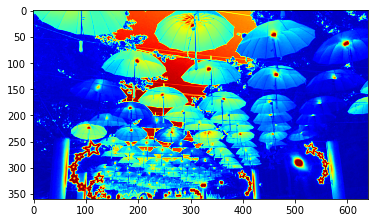

In [7]:
plt.imshow(img_grayscale, cmap="jet")
plt.show()

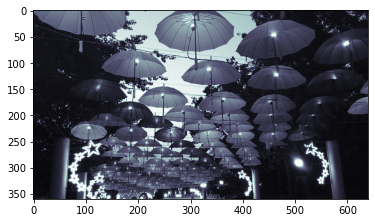

In [8]:
plt.imshow(img_grayscale, cmap="bone")
plt.show()

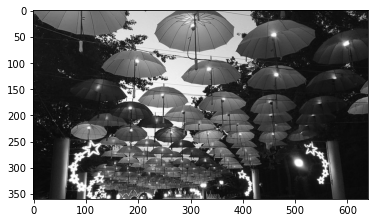

In [9]:
plt.imshow(img_grayscale, cmap="gray")
plt.show()

* Izrežite pravokotno regijo s slike in jo izrišite kot novo sliko. Regijo v prvi sliki bomo označili tako, da modri kanal postavimo na nič.

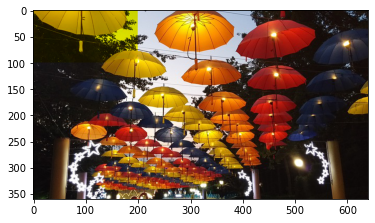

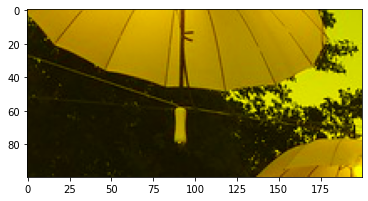

In [10]:
img_cut = img[0:100, 0:200]
img_cut[:, :, 2] = 0

plt.imshow(img)
plt.show()
plt.imshow(img_cut)
plt.show()

* Izrišite sivinsko sliko, kjer del sivinske verzije slike negirate.

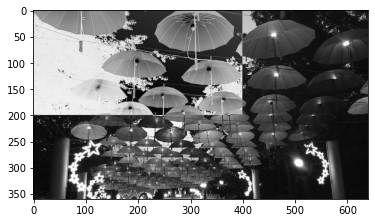

In [11]:
img_grayscale[0:200, 0:400] = 255 - img_grayscale[0:200, 0:400]

plt.imshow(img_grayscale, cmap="gray")
plt.show()

* Izrišite upragovano binarno sliko, v kateri vrednost $1$ označuje elemente, ki imajo v izhodiščni sliki sivinski nivo večji od $150$ in spremenite barvno lestvico v črnobelo.

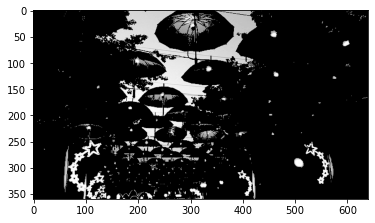

In [12]:
img_grayscale = np.mean(img_float, axis=2)
img_binary = np.where(img_grayscale > 150, img_grayscale, 1)
img_binary = np.where(img_binary != 1, img_binary, 1)

plt.imshow(img_binary, cmap="gray")
plt.show()

## Naloga 3: Histogrami

V nadaljevanju si bomo ogledali, kako gradimo in prikazujemo histograme. Histogrami so zelo uporaben način opisa slike, s katerim lahko veliko povemo o porazdelitvi slikovnih elementov v sliki, s tem pa do neke mere tudi kaj o vsebini slike. Zaradi njihove preprostosti in uporabnosti so zelo razširjeni, zato posvetite pozornost procesu grajenja, ki ga bomo opisali v tej nalogi.

Podana je $3$-bitna sivinska slika:

<center>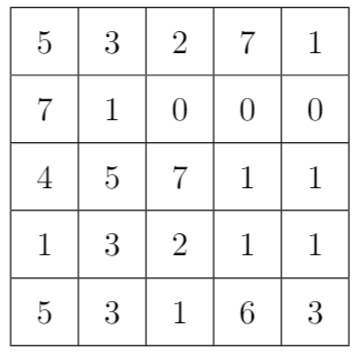</center>

* Določite histogram za podano sliko (v obliki tabele in z grafično predstavitvijo). Rešitev poslikaj in dodajte sliko v Jupyter notebook <i>(Edit -> Inster Image)</i>.

<BarContainer object of 8 artists>

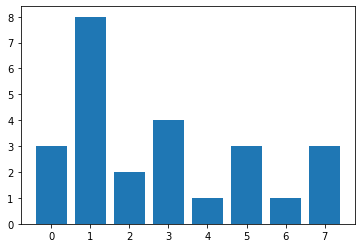

In [13]:
x = [x for x in range(8)]
y = [3, 8, 2, 4, 1, 3, 1, 3]

plt.bar(x, y)

 * Na podlagi izračunanega histograma določite kumulativni histogram slike. Rešitev poslikaj in dodajte sliko v Jupyter notebook <i>(Edit -> Inster Image)</i>.

<BarContainer object of 8 artists>

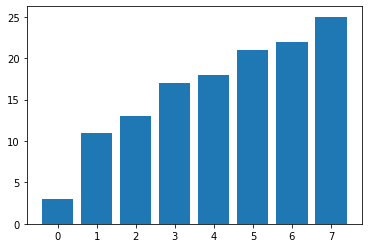

In [14]:
x = [x for x in range(8)]
y = [3, 11, 13, 17, 18, 21, 22, 25]

plt.bar(x, y)

* Kakšen bi bil histogram, če bi bila slika $4$-bitna?

<BarContainer object of 16 artists>

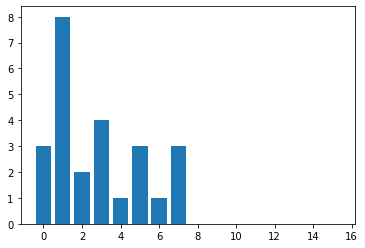

In [15]:
x = [x for x in range(16)]
y = [3, 8, 2, 4, 1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]

plt.bar(x, y)

* Računanje histograma je implementirano v MatPlotLib v okviru funkcije <i>hist</i>. Naložite sliko <i>umbrellas.jpg</i> in jo spremenite v sivinsko. Ker funkcija <i>hist()</i> ne deluje na slikah ampak na zaporedju vrednosti, moramo sliko najprej preoblikovati iz matrike velikosti $(N \times M)$ v $1$-D vektor velikosti $N M \times 1$, ta vektor pa se nato uporabi za izračun histograma. Prav tako je pomembno, da so vhodne vrednosti tipa <i>double</i>. Izrišite histograme za različno število celic.

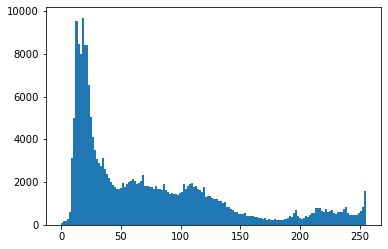

In [16]:
img = cv2.imread('./res/umbrellas.jpg', 1) #in BGR format

# split channels
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img_float = img.astype(float)
img_flat = np.mean(img_float, axis=2).flatten()

N, M = np.mean(img_float, axis=2).shape
img_hist = np.reshape(img_flat, (N * M, 1))
plt.hist(img_hist, bins=150);

* V okviru naslednje točke boste implementirali operacijo <i>razteg histograma</i>. Z uporabo pripravljenega skeleta implementirajte funkcijo <i>histogram_stretch()</i>, ki vhodno sliko popravi tako, da njene vrednosti raztegne preko celotnega spektra sivinskih nivojev. Za okvirni potek algoritma se zgledujte po prosojnicah s predavanj. Ker funkcija opravlja enako operacijo na vseh slikovnih elementih slike, implementirajte celotno funkcijo brez zank z uporabo matričnih operacij.

Namigi: Za vhodno sliko lahko določite najvišjo $v_{max}$ in najnižjo $v_{min}$ sivinsko vrednost z <i>np.max(I)</i> in <i>np.min(I)</i>.

Pomembno: pri nalogi je prepovedana uporaba integriranih funkcij, izračun novih vrednosti morate implementirati sami.

Za preizkus funkcije preberite z diska datoteko <i>phone.jpg</i> (ki je že sivinska slika) in zanjo izrišite histogram z $256$ celicami. S histograma lahko opazite, da najnižja sivinska vrednost v sliki ni $0$, in najvišja ni $255$. Nato na sliki opravite razteg histograma ter prikažite rezultat v obliki slike in njenega histograma (histogrami naj vsebujejo $256$ celic).

In [17]:
def histogram_stretch(I):
    a_high = np.max(I)
    a_low = np.min(I)
    
    I_stretched = (I - a_low) * 255.0/(a_high - a_low) 
    return I_stretched

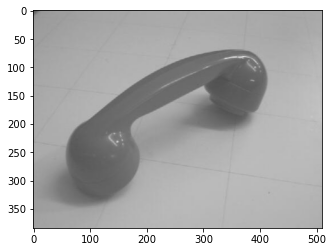

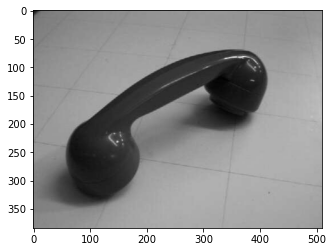

In [18]:
img = cv2.imread('./res/phone.jpg', 1)
plt.imshow(img)
plt.show()

img = histogram_stretch(img)
img = img.astype("uint8")
plt.imshow(img)
plt.show()

* Upragovanje slike je zelo uporabno pri implementaciji preproste detekcije objektov, vendar je določitev praga pogosto problematična. Preizkusite OpenCV funkcijo <i>threshold()</i>, ki zna določiti prag samodejno z uporabo različnih metod, vključno z <i>Otsu</i>-jevo metodo, ki temelji na analizi histograma slike.

In [19]:
img = cv2.imread('./res/umbrellas.jpg', 1) #in BGR format
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

img_float = img.astype(float)
img_grayscale = np.mean(img_float, axis=2)

ret, thresh1 = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_TOZERO_INV)

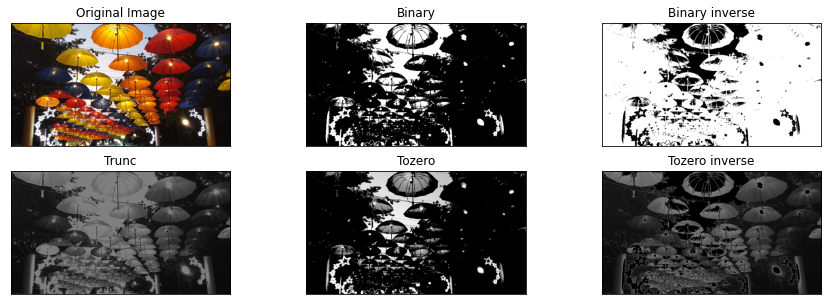

In [20]:
titles = ['Original Image','Binary','Binary inverse','Trunc','Tozero','Tozero inverse']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15, 5))

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [21]:
img = cv2.imread('./res/umbrellas.jpg', 1) #in BGR format
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

img_float = img.astype(float)
img_grayscale = np.mean(img_float, axis=2)
img_grayscale = img_grayscale.astype(np.uint8)

ret2, thresh2 = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_grayscale.dtype

dtype('uint8')

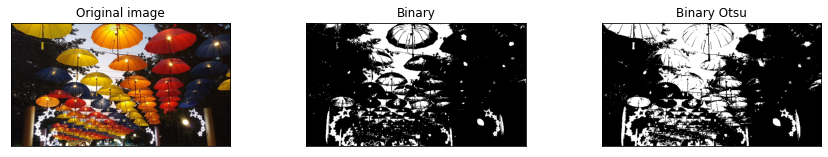

In [22]:
titles = ["Original image", "Binary", "Binary Otsu"]
images = [img, thresh1, thresh2]
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

* Kakšen histogram je idealen za Otsu-jevo metodo, ali, povedano drugače, na kakšnih slikah ta metoda deluje dobro?

#### Answer
For an image with only two distinct image values (where the histogram would only consist of two peaks), a good threshold would be in the middle of those two values. Similarly, Otsu's method determines an optimal global threshold value from the image histogram. It is especially useful in noisy images.

## Naloga 4: Barvni prostori

Kot ste slišali že na predavanjih, lahko barvo zapišemo v različnih barvnih prostorih. Vsak barvni prostor ima svoje značilnosti. V okviru naloge si boste pogledali, kako lahko s pretvorbo med RGB in HSV barvnima prostoroma na preprost način dosežemo zanimive rezultate. Najprej pa dve računski nalogi, v okviru katerih boste osvežili poznavanje algoritmov pretvorbe, ki ste jih spoznali na predavanjih (so napisani v prosojnicah):

* Barvo, zapisano v RGB barvnem prostoru z $(255, 34, 126)$ bi radi preslikali v barvni prostor HSV. Ročno izvedite postopek preslikave in izračunajte rezultat pretvorbe. Rešitev in postopek poslikajte ter vstavite v Jupyter Notebook.

#### Answer

$$ R' = \frac{255}{255}\ = 1 $$ <br>
$$ G' = \frac{34}{255}\ = 0.1333 $$ <br>
$$ B' = \frac{126}{255}\ = 0.4941 $$ <br><br>

$$ C_{max} = R' = 1 $$ <br>
$$ C_{min} = G' = 0.1333 $$ <br>
$$ \Delta = 0.8667 $$ <br><br>

H = 335, S = 86.7, V = 100

* Barvo, zapisano v HSV barvnem prostoru z $(0.65, 0.7, 0.15)$ bi radi preslikali v barvni prostor RGB. Ročno izvedite postopek preslikave in izračunajte rezultat pretvorbe. Rešitev in postopek poslikajte ter vstavite v Jupyter Notebook.

R = 38, G = 28, B = 11

* Oglejmo si pretvetvo med barvnimi prostori na konkretnem primeru z uporabo OpenCV funkcije <i>cvtColor()</i>. Preberimo sliko <i>trucks.jpg</i> ter jo prikažite na zaslonu kot RGB sliko ter vsako komponento posebej kot sivinsko sliko. Nato bomo pretvorili prebrano sliko v HSV barvni prostor z uporabo funkcije <i>cvtColor()</i> ter prikazali na zaslonu vsako komponento posebej kot sivinsko sliko. Potrebno je paziti na pravilno obravnavo tipov matrik, saj je RGB slika privzeto shranjena v matriki tipa <i>uint8</i> (cela števila od $0$ do $255$), slika v barvnem prostoru HSV pa v matriki tipa <i>double</i> (realna števila od $0$ do $1$).


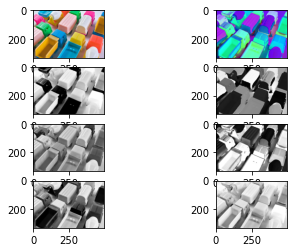

In [23]:
I_trucks_bgr = cv2.imread('./res/trucks.jpg')
I_trucks_rgb = cv2.cvtColor(I_trucks_bgr, cv2.COLOR_BGR2RGB)
I_trucks_hsv = cv2.cvtColor(I_trucks_bgr, cv2.COLOR_BGR2HSV)

plt.figure()
plt.subplot(421)
plt.imshow(I_trucks_rgb)  # RGB slika
plt.subplot(422)
plt.imshow(I_trucks_hsv, cmap=plt.cm.hsv)  # HSV slika
plt.subplot(423)
plt.imshow(I_trucks_rgb[:,:,0], cmap='gray')  # Red komponenta
plt.subplot(424)
plt.imshow(I_trucks_hsv[:,:,0], cmap='gray')  # Hue komponenta
plt.subplot(425)
plt.imshow(I_trucks_rgb[:,:,1], cmap='gray')  # Green komponenta
plt.subplot(426)
plt.imshow(I_trucks_hsv[:,:,1], cmap='gray')  # Saturation komponenta
plt.subplot(427)
plt.imshow(I_trucks_rgb[:,:,2], cmap='gray')  # Blue komponenta
plt.subplot(428)
plt.imshow(I_trucks_hsv[:,:,2], cmap='gray')  # Value (Intensity) komponenta

plt.show()

* Različni barvni prostori so koristni tudi, ko pride do upragovanja. V RGB barvnem prostoru je recimo težko na preprost način določiti področja, ki pripadajo določenemu barvnemu odtenku. Napišite skripto, ki sliko <i>trucks.jpg</i> upraguje po modrem kanalu za vrednost praga $150$. Prikažite originalno sliko ter binarno sliko eno ob drugi.

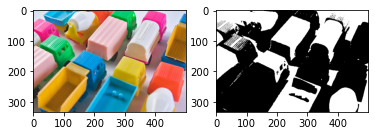

In [24]:
def threshold_B(I):
    I_res = np.zeros((I.shape[0], I.shape[1]))
    ones = I[:, :, 2] > 150
    I_res[ones] = 1
    return I_res

thresh = threshold_B(I_trucks_rgb)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I_trucks_rgb)
ax2.imshow(thresh, cmap="gray")

* Za osnovne komponene (rdeča, zelena, modra) se upragovanje poenostavi, če sliko preslikamo v normalizirani RGB prostor, kjer je vrednost vsake barve deljena z vsoto vrednosti vseh treh komponent (takemu prostoru rečemo tudi <i>normalizirani RGB</i>). Napišite kodo, ki modro komponento slike po celicah deli z vsoto soležnih treh barvnih komponent (uporabite funkcijo <i>np.sum</i>). Na tako sliko aplicirajte upragovanje (ker so normalizirane vrednosti definirane na razponu vrednosti od $0$ do $1$ je treba prag prilagoditi. Eksperimentirajte z vrednostmi okoli $0.5$ ter upragovano sliko prikažite.


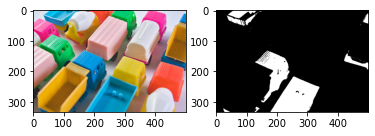

In [25]:
def threshold_norm_B(I, thresh=0.5):
    I_res = np.zeros((I.shape[0], I.shape[1]))
    I_norm = np.apply_along_axis(lambda x: x[2] / np.sum(x) * 1.0, 2, I)
    ones = I_norm > thresh
    I_res[ones] = 1
    return I_res

thresh = threshold_norm_B(I_trucks_rgb)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I_trucks_rgb)
ax2.imshow(thresh, cmap="gray")

* Na tak način lahko določimo regije rdeče, zelene in modre barve. Če pa bi želeli izluščiti poljuben odtenek, se je najbolj intuitivno poslužiti preslikave v HSV barvni prostor. Dodajte kodo, ki sliko iz RGB barvnega prostora preslika v HSV prostor ter upragujte po komponenti odtenka (Hue). Ker zavzema modra barva samo del vrednostnega območja, je potrebno sliko upragovati z dvema pragoma. To se najhitreje reši kot logična funkcija dveh mask (vsako dobimo z uporabo enega praga). Primer: $AB = A \& B$. V pomoč pri določitvi pragov za modro barvo lahko uporabite naslednjo kodo, ki vam prikaže barvni spekter cele komponente odtenka:

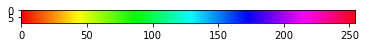

In [26]:
import numpy as np
plt.figure()
plt.imshow(np.meshgrid(np.linspace(0, 1, 255), np.ones((10, 1)))[0], cmap=plt.cm.hsv)
plt.show()

In [27]:
def threshold_hsv(I, low, high, saturation_min=0):
    I_res = np.zeros((I.shape[0], I.shape[1]))
    I_hsv = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)
    
    ones = I_hsv[:,:, 0] * 2 > low
    ones &= I_hsv[:,:,0] * 2 < high
    ones &= I_hsv[:,:,1] > saturation_min
    I_res[ones] = 1
    
    return I_res

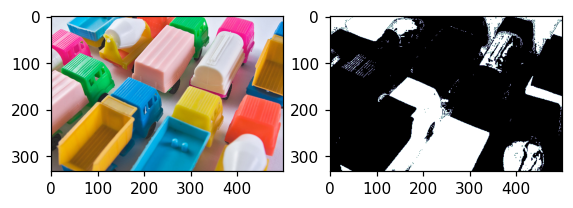

In [28]:
I_trucks_blue = threshold_hsv(I_trucks_rgb, 165, 231)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(110)
ax1.imshow(I_trucks_rgb)
ax2.imshow(I_trucks_blue, cmap="bone")

* Eksperimentirajte z robnimi vrednostmi območja ter optimalno upragovano sliko prikažite. Postopek ponovite za poljubno izbrano sliko (sliko si izberite sami, prav tako si izberite barvo, ki bi jo radi izluščili iz slike).

In [29]:
img_bird = cv2.imread("./res/bird.jpg")
img_bird = cv2.cvtColor(img_bird, cv2.COLOR_BGR2RGB)

img_tresht = threshold_hsv(img_bird, 20, 45, 10)

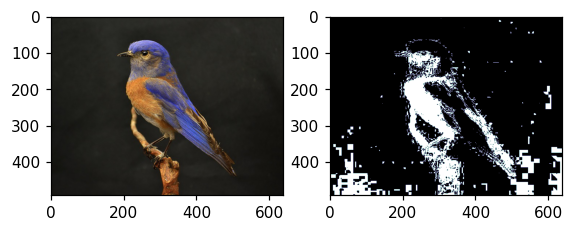

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(110)
ax1.imshow(img_bird)
ax2.imshow(img_tresht, cmap="bone")

* Implementirajte funkcijo <i>im_mask</i>, ki ji lahko podate sliko v RGB barvnem prostoru ter binarno sliko iste velikosti, funkcija pa vam vrne barvno sliko, kjer je barva slikovnih elementov postavljena na črno, če je vrednost soležnega elementa v maski $0$. Funkcijo implementirajte brez eksplicitnih zank.

In [31]:
def im_mask(I, mask):
    I_masked = np.copy(I)
    zeros = (mask == 0)
    I_masked[zeros] = [0, 0, 0]
    
    return I_masked

In [32]:
img_bird = cv2.imread("./res/bird.jpg")
img_bird = cv2.cvtColor(img_bird, cv2.COLOR_BGR2RGB)

img_mask = threshold_hsv(img_bird, 20, 45, 10)
img_masked = im_mask(img_bird, img_mask)

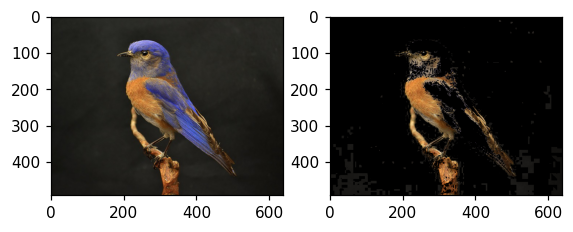

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(110)
ax1.imshow(img_bird)
ax2.imshow(img_masked, cmap="bone")

## Naloga 5: Regije in morfološke operacije

V tej nalogi si boste ogledali kako iz binarne slike izluščiti posamezne regije, kako te regije zapisati na različne načine, ter, kako si lahko z uporabo morfoloških operacijpomagamo pri detekciji regij v šumnih slikah.

Za razčlenitev regij na sliki se zaradi njegove časovne predvidljivosti najpogostejeuporablja algoritem zaporednega označevanja regij, oziroma povezanih komponent, kiste ga obravnavali na predavanjih. Za začetek ponovimo delovanje algoritma z ročnimreševanjem preprostega primera:

* Podana je črno-bela slika za katero določite rezultat algoritma barvanja regij po prvem in drugem sprehodu po sliki ter povezave med oznakami za okolico $\mathcal{N}_4$. Na sliki so z $1$ označena področja objektov v sliki, celice z vrednostjo $0$ pa so ozadje. Rešitev in postopek poslikajte in vstavite v Jupyter Notebook.

$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 1 \\ 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\ 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\ 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$  

* Preberite sliko <i>regions.png</i>. Kljub temu, da slika vsebuje zgolj dve vrednosti, ni shranjena v tipu binarnih logičnih vrednosti, zato jo najprej spremenitev binarno z uporabo funkcije <i>threshold</i> in uporabo ustreznega praga (recimo $127$). Uporabite funkcijo <i>connectedComponents()</i>, ki implementira algoritem označevanja povezanih regij. Izpišite število regij (vključno z ozadjem) in prikažite maske, ki označujejo posamezne regije.

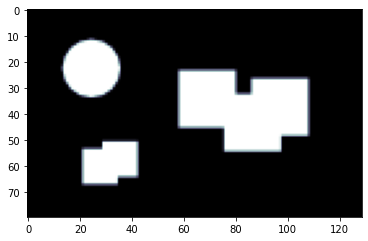

In [34]:
img_regions = cv2.imread("./res/regions.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_regions, cmap="bone")
plt.show()

4


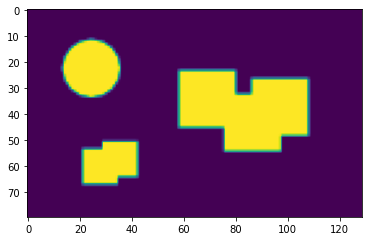

In [35]:
_, thresh = cv2.threshold(img_regions, 127, 255, cv2.THRESH_BINARY)
comp_num, comp_img = cv2.connectedComponents(thresh, connectivity=4)

print(comp_num)
img_regions = cv2.imread("./res/regions.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_regions);

* Za posamezne regije iz prejšnje naloge določite centroid ter okvir okoli regije (BoundingBox). Navedene lastnosti prikažite nad sliko maske.

Namig: za izris centroidov uporabite PyPlot funkcijo <a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html"><i>scatter</i></a>, za izris pravokotnikov pa PyPlot funkcijo <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html"><i>Rectangle()</i></a>.

In [36]:
def find_centroids(I_labeled):
    x = []
    y = []
    rect = []
        
    comp_num = np.max(I_labeled)
    for comp in range(1, comp_num + 1):
        I_sel = np.zeros((I_labeled.shape[0], I_labeled.shape[1]))
        comp_sel = I_labeled == comp #get where current component is located
        I_sel[comp_sel] = 1
        
        #moments
        M = cv2.moments(I_sel)
        cX = int(M["m10"] / M["m11"])
        cY = int(M["m01"] / M["m11"])
        
        #get min and max values where the component is located so you can draw the rectangles
        idx_u, idx_v = np.where(comp_sel)
        u_min = np.min(idx_u) - 1
        u_max = np.max(idx_u)
        
        v_min = np.min(idx_v) - 1
        v_max = np.max(idx_v)
        
        rectangle = ((v_min, u_min), v_max - v_min, u_max - u_min)
        rect.append(rectangle)
        x.append(cX)
        y.append(cY)
        
    return ([x, y], rect)

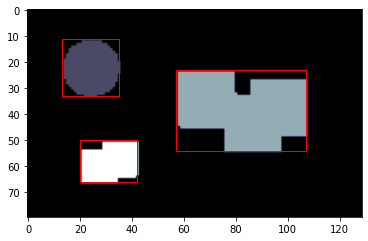

In [38]:
import matplotlib.patches as patches
centroids, rectangles = find_centroids(comp_img)

fig, ax = plt.subplots()
ax.imshow(comp_img, cmap="bone")
ax.scatter(centroids[0], centroids[1], color="k")

for rect in rectangles:
    xy, w, h = rect
    rect = patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

plt.show()

Na žalost binarne slike, pridobljene iz realnih podatkov, pogosto niso tako lepe kot slike, s katerimi smo delali do sedaj. V realnih slikah je veliko šuma, ki se v binarni sliki odraža kot drobne regije ali luknjice v regijah, ki motijo nadaljnje procesiranje. V takih primerih so zelo priročne morfološke operacije, s pomočjo katerih lahko tak šum odpravimo. V okviru te naloge bomo spoznali morfološki operaciji skrči (<i>erode</i>) in razširi (<i>dilate</i>) v kontekstu odstranjevanja šuma iz binarne slike.

Najprej na kratko ponovite delovanje obeh operacij z naslednjo nalogo: 

* Podana je črno-bela slika $A$ za katero določite rezultat algoritma filtriranja s filtroma razširi ter skrči za jedro $K$. Rešitev poslikajte in vstavite v Jupyter Notebook.

$$K = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 0 \\ 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 \\ 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 \end{bmatrix}$$  

In [39]:
matrix = np.zeros((8, 9))
matrix[0:3, 7] = 1
matrix[1:5, 3] = 1
matrix[3, 0:3] = 1
matrix[6, 6:8] = 1
matrix[7, 5:8] = 1

matrix[2, 1] = 1
matrix[2, 6] = 1
matrix[3, 5] = 1
matrix[4, 0] = 1
matrix[4, 4] = 1
matrix[1, 4] = 1
matrix = matrix * 255

kernel = np.array(([1, 1, 1], [1, 1, 1], [0, 1, 0]), dtype = "uint8")

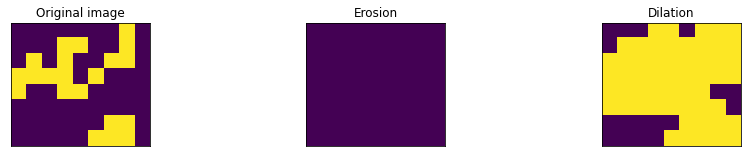

In [40]:
erosion = cv2.erode(matrix, kernel, iterations = 1)
dilation = cv2.dilate(matrix, kernel, iterations = 1)

titles = ["Original image", "Erosion", "Dilation"]
images = [matrix, erosion, dilation]
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

* Naložite sliko <i>regions_noise.png</i>, jo spremenite v črno-belo in nato binarizirajte z uporabo ustreznega praga. Uporabite funkcijo <i>connectedComponents()</i> za določitev regij in regije preštejte. Kaj opazite? Kako velike so posamezne regije?

In [ ]:
img_noise = cv2.imread("./res/regions_noise.png", cv2.IMREAD_GRAYSCALE)
_, noise_thresh = cv2.threshold(img_noise, 127, 255, cv2.THRESH_BINARY)

noise_com_num, noise_com_img = cv2.connectedComponents(noise_thresh, connectivity=4)

print(noise_com_num)
plt.imshow(noise_com_img, cmap="gray")

* Na sliki preizkusite OpenCV funkciji <i>dilate()</i> in <i>erode()</i> ter vizualizirajte njiune rezultate.

In [ ]:
# Inicializacija preprostega jedra
kernel = np.ones((3, 3), np.uint8)

dilate = cv2.dilate(img_noise, kernel)
erode = cv2.erode(img_noise, kernel)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_dpi(110)

ax1.imshow(img_noise, cmap="bone")
ax1.set_title("Original image")

ax2.imshow(dilate, cmap="bone")
ax2.set_title("Dialited image")

ax3.imshow(erode, cmap="bone")
ax3.set_title("Eroded image")

* S pomočjo kombinacije funkcij <i>erode()</i> in <i>dilate()</i> implementirajte še operaciji odpiranja (<i>opening</i>) in zapiranja (<i>closing</i>) ter rezultat primerjajte z vgrajenima funkcijama implementiranima v sklopu OpenCV funkcije <i>morphologyEx()</i>. Prikažite rezultat obeh operacij na upragovani sliki <i>regions_noise.png</i>. Glede na rezultate premislite, kako bi odpravi celoten šum, ki je prisoten v izvorni binarni sliki? Rešitev implementirajte in preizkusite.

In [ ]:
def open_img(I, kernel):
    I_res = cv2.erode(I, kernel)
    I_res = cv2.dilate(I_res, kernel)
    return I_res

def close_img(I, kernel):
    I_res = cv2.dilate(I, kernel)
    I_res = cv2.erode(I_res, kernel)
    return I_res

In [ ]:
kernel = np.ones((3, 3), np.uint8)

img_opened = open_img(noise_thresh, kernel)
img_closed = close_img(noise_thresh, kernel)

cv_opened = cv2.morphologyEx(noise_thresh, cv2.MORPH_OPEN, kernel)
cv_closed = cv2.morphologyEx(noise_thresh, cv2.MORPH_CLOSE, kernel)

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_dpi(110)

axs[0, 0].imshow(img_opened, cmap="bone")
axs[0, 0].set_title("Opened")

axs[0, 1].imshow(img_closed, cmap="bone")
axs[0, 1].set_title("Closed")

axs[1, 0].imshow(cv_opened, cmap="bone")
axs[1, 0].set_title("Opened cv")

axs[1, 1].imshow(cv_closed, cmap="bone")
axs[1, 1].set_title("Closed cv")

In [ ]:
def modified_open(I, kernel):
    I_res = cv2.erode(I, kernel)
    I_res = cv2.dilate(I_res, kernel)
    I_res = cv2.dilate(I_res, kernel)
    return I_res

In [ ]:
img_mod = modified_open(noise_thresh, kernel)
plt.imshow(img_mod, cmap="bone")
plt.title("Image after removing noise")

<b>$\star$ (10 točk)</b> Pridobljeno znanje o uporabi morfoloških operacij preizkusite še na bolj realnem primeru. Preberite sliko <i>bird.jpg</i>, spremenite jo v sivinsko ter določite prag, da dobite čim boljšo masko objekta. Ker popolne maske ne morete dobiti samo z globalnim pragom, jo izboljšajte z uporabo morfoloških operacij. Število točk, ki jih boste dobili za nalogo je odvisno od kakovosti rezultata.

In [ ]:
# Zapišite rešitev tukaj

## Naloga 6: Delo z živimi slikami


V okviru te naloge si bomo ogledali delo z "živimi" slikami. Za reševanje naloge boste potrebovali spletno kamero. V primeru, da le-te nimate na razpolago, lahko nalogo rešite tudi z uporabo poljubnega video izseka - princip reševanja naloge bo enak.

* Oglejmo si kodo za pridobitev slike iz spletne kamero ter prikaz le-te. Za prekinitev izvajanje funkcijo bom definirali tipko <i>q</i>.

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # Prikazi trenutno sliko
    cv2.imshow('frame', frame)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

* Izrišite trenutno sliko spletne kamere poleg katere vizualizirate tudi pripadajočo sivinsko sliko. Izrisani sliki zrcalite z uporabo OpenCV funkcije <i>flip()</i>.

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    numpy_horizontal = np.hstack((frame, gray))
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # Prikazi trenutno sliko
    cv2.imshow('frame', numpy_horizontal)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

* (+<b>5 točk</b>) Izberite si predmet poljubne barve in z uporabo znanja iz prejšnjih nalog upragujte sliko s takšnimi vrednostmi, da boste iz nje izluščili izbrani predmet. Z uporabo OpenCV funkcije <i><a href="https://docs.opencv.org/4.2.0/d4/d73/tutorial_py_contours_begin.html" target="_blank">findContours()</a></i> izrišite konturo okoli izluščenih predmetov. Število točk, ki jih boste dobili za to nalogo bo odvisno od robustnosti delovanja vaše metode. 

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

while(True):
    ret, frame = cap.read()
    #convert to hsv
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #define bounds for color and get mask
    blue_lower = np.array([95, 80, 2], np.uint8) 
    blue_upper = np.array([135, 255, 255], np.uint8) 
    blue_mask = cv2.inRange(hsv_frame, blue_lower, blue_upper)
    
    #create kernel of morphological operations
    kernel = np.ones((5, 5), "uint8")
    res_blue = modified_open(frame, kernel)
    
    # Creating contour to track blue color 
    contours, hierarchy = cv2.findContours(blue_mask, 
                                        cv2.RETR_TREE, 
                                        cv2.CHAIN_APPROX_SIMPLE) 
    
    for pic, contour in enumerate(contours): 
        area = cv2.contourArea(contour) 
        if(area > 300): 
            x, y, w, h = cv2.boundingRect(contour) 
            frame = cv2.rectangle(frame, (x, y), 
                                    (x + w, y + h), 
                                    (255, 0, 0), 2)
        
    if ret == False:
        break

    cv2.imshow('Bloo', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()